<a href="https://colab.research.google.com/github/Piyu02-12/Data_Science_Code/blob/main/SIMPLE_LINEAR_REGRESSION_ASSIGNMENT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data = pd.read_csv("/content/delivery_time.csv")  
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA AND VISUALIZATION

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.shape

(21, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


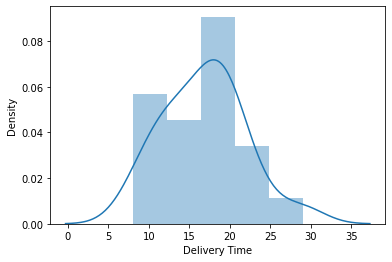

In [ ]:
sns.distplot(data['Delivery Time'])

In [ ]:
data["log_dt"]=np.log(data["Delivery Time"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


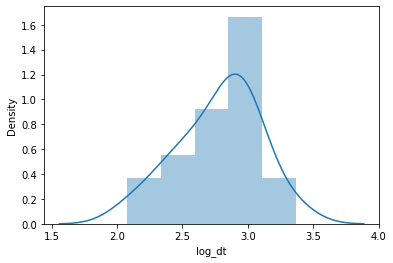

In [ ]:
sns.distplot(data['log_dt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


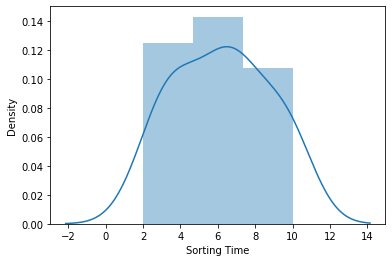

In [ ]:
sns.distplot(data['Sorting Time'])

In [ ]:
data["log_Sorting"]=np.log(data["Sorting Time"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


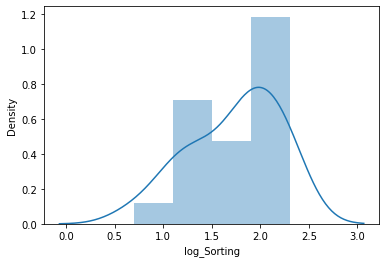

In [ ]:
sns.distplot(data['log_Sorting'])

In [ ]:
data.head()

,Delivery Time,Sorting Time,log_dt,log_Sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


# FEATURE ENGINNERING

In [ ]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1) 
data.head()

,delivery_time,sorting_time,log_dt,log_Sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


## CORRELATION ANALYSIS

In [ ]:
data.corr() 

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


### MODEL BUILDING

In [ ]:
model=smf.ols("delivery_time ~ sorting_time" , data=data).fit() 
dtlog_model=smf.ols("log_dt~log_Sorting",data=data).fit()

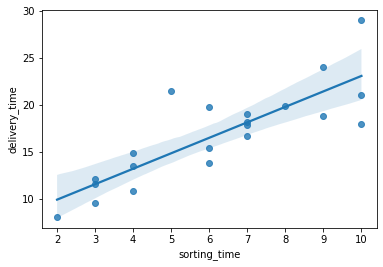

In [ ]:
sns.regplot(x = "sorting_time" , y = "delivery_time" , data=data) 

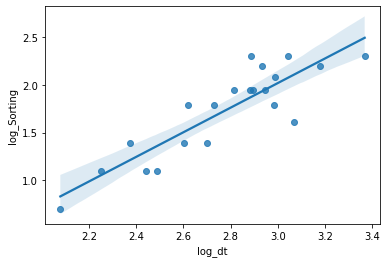

In [ ]:
sns.regplot(x = "log_dt" , y = "log_Sorting" , data=data) 

# MODEL TESTING

In [ ]:
#coefficient
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
dtlog_model.params

Intercept      1.741987
log_Sorting    0.597522
dtype: float64

In [ ]:
#t-value and p-value 
print(model.tvalues , model.pvalues) 

Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [ ]:
print(dtlog_model.tvalues , dtlog_model.pvalues) 

Intercept      13.085552
log_Sorting     8.024484
dtype: float64 Intercept      5.921137e-11
log_Sorting    1.601539e-07
dtype: float64


In [ ]:
#Rsquared Values 
print(model.rsquared , model.rsquared_adj) 

0.6822714748417231 0.6655489208860244


In [ ]:
print(dtlog_model.rsquared , dtlog_model.rsquared_adj) 

0.77216134926874 0.7601698413355158


after getting the rsquared value we can say that the model is not so good 

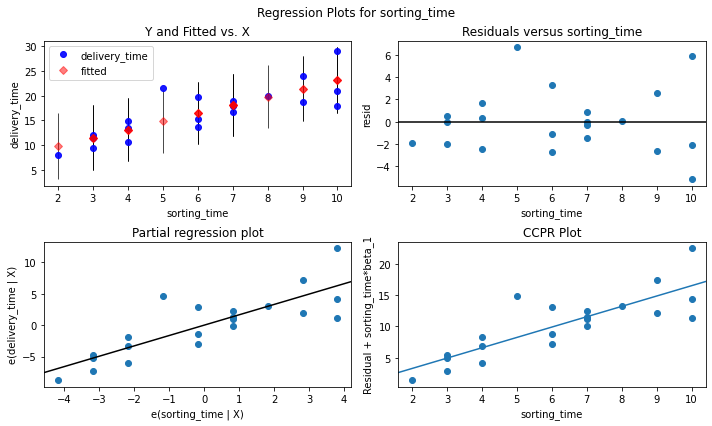

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"sorting_time", fig=fig)

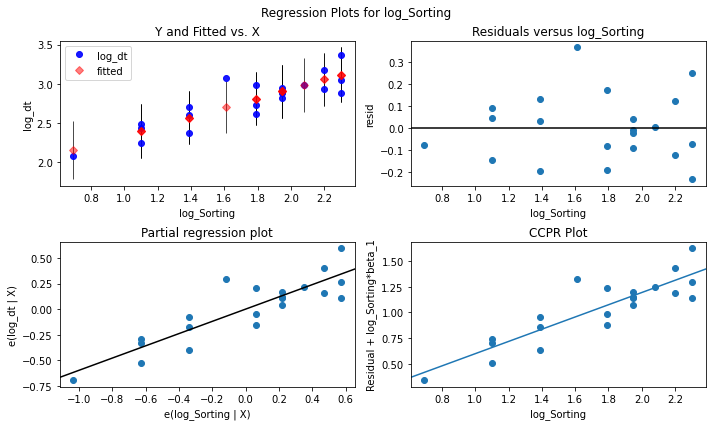

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(dtlog_model,"log_Sorting", fig=fig)

# MODEL PREDICTION

In [ ]:
newdata = pd.Series([10 , 8])

In [ ]:
data_pred = pd.DataFrame(newdata  , columns = ['sorting_time']) 
data_pred 

,sorting_time
0,10
1,8


In [ ]:
model.predict(data_pred) 

0    23.072933
1    19.774893
dtype: float64